<CENTER><h1> H&#8594;WW in comparison between others production processes of W dibosons </h1></CENTER>

## C++ notebook example

The first step is to load some basic libraries of c++:

In [1]:
#include <TChain.h>
#include <vector>
#include <TFile.h>
#include <iostream>
#include <string>
#include <stdio.h>

The data we want to use to perform our analysis can be found in [https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC](https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC) and the name of the root files that we are going to use are called "mc_345324.ggH125_WW2lep.2lep.root" (the signal) and "mc_363492.llvv.2lep.root" (the background). Thus, we can use TFile to extract the information of signal and background processes:

In [2]:
TFile *f_sig = TFile::Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_345324.ggH125_WW2lep.2lep.root");
TTree *t_sig = (TTree*)f_sig->Get("mini");
int n_sig_events = t_sig->GetEntries();
cout << n_sig_events << endl;

628685


In [3]:
TFile *f_bkg = TFile::Open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/2lep/MC/mc_363492.llvv.2lep.root");
TTree *t_bkg = (TTree*)f_bkg->Get("mini");
int n_bkg_events = t_bkg->GetEntries();
cout << n_bkg_events << endl;

3409043


Once we have defined our trees (t_sig and t_bkg), we can create different variables that we will use to perform the our analysis. Some of these variables are integers or floats type. The idea is to save the information of the events of each entry, which is contained our trees, in the new variables we have just created:

In [4]:
UInt_t jet_n_sig = -1;
float_t met_et_sig = 0;

t_sig->SetBranchAddress("jet_n", &jet_n_sig);
t_sig->SetBranchAddress("met_et", &met_et_sig);

In [5]:
UInt_t jet_n_bkg = -1;
float_t met_et_bkg = 0;

t_bkg->SetBranchAddress("jet_n", &jet_n_bkg);
t_bkg->SetBranchAddress("met_et", &met_et_bkg);

Next, we define the canvas, which allows us to visualize the graphics, and the histograms in which we are going to save the missing transverse energy and the number of jets of each event in the signal and background processes:

In [6]:
TCanvas *canvas = new TCanvas();
TH1F *hist_sig_met = new TH1F("h_sig_met", "Normalized Comparison Missing Transverse Energy; Met_et [GeV] ; Events", 20, 0, 200);
TH1F *hist_bkg_met = new TH1F("h_bkg_met", "Normalized Comparison Missing Transverse Energy; Met_et [GeV] ; Events", 20, 0, 200);
TH1F *hist_sig_jet_n = new TH1F("hist_sig_jet_n","Normalized Comparison Number of Jets",10,0,10);
TH1F *hist_bkg_jet_n = new TH1F("hist_bkg_jet_n","Normalized Comparison Number of Jets",10,0,10);

The next line of the code will make the corresponding analysis of the comparison between signal and background processes. Here we have two for loops in which we fill the histograms of MET and number of jets for signal and background. As signal and background root files have different numbers of events, it is needed to do two loops instead of one. If we want to plot the missing energy in GeV units, we can divide the met_et_sig and met_et_bkg variables per 1000 to go from MeV to GeV:

In [7]:
int nbytes = 0;

for (int ii=0; ii<n_sig_events; ii++)
{
    nbytes = t_sig->GetEntry(ii);
    hist_sig_met->Fill(met_et_sig/1000);
    hist_sig_jet_n->Fill(jet_n_sig);
}

for (int jj=0; jj<n_bkg_events; jj++)
{
    nbytes = t_bkg->GetEntry(jj);
    hist_bkg_met->Fill(met_et_bkg/1000);
    hist_bkg_jet_n->Fill(jet_n_bkg);
}

cout << "Done!" << endl;

Done!


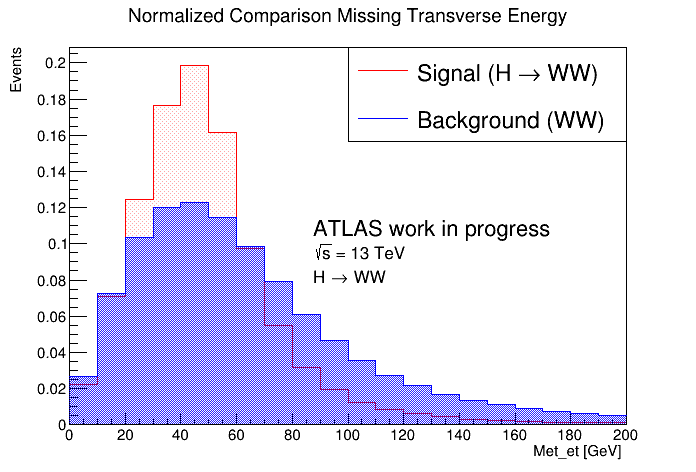

In [8]:
// We create a legend to identify the signal and background MET histograms in the plot
TLegend *leg = new TLegend(0.5, 0.7, 0.9, 0.9); // Position of the legend in the canvas
leg->AddEntry(hist_sig_met, "Signal (H #rightarrow WW)","l"); 
leg->AddEntry(hist_bkg_met, "Background (WW)","l");

hist_sig_met->SetStats(0);
hist_bkg_met->SetStats(0);

hist_sig_met->SetFillStyle(3003);
hist_sig_met->SetFillColorAlpha(kRed, 0.35);
hist_sig_met->SetLineColor(2);

hist_bkg_met->SetFillStyle(3001);
hist_bkg_met->SetFillColorAlpha(kBlue, 0.85);
hist_bkg_met->SetLineColor(4);

hist_sig_met->DrawNormalized(""); // Draw the normalized histograms in order to perform a better comparison of MET

hist_bkg_met->DrawNormalized("same"); // Draw the background MET histogram in the same plot of signal MET histogram with "same"

TLatex l; // We use TLatex to include text latex in plots
l.SetNDC();
l.SetTextFont(42); 
l.SetTextColor(kBlack);
l.SetTextSize(0.05);  
l.DrawLatex(0.45,0.5,"ATLAS work in progress"); // Position of the text in the canvas

TLatex o;
o.SetNDC();
o.SetTextFont(42);
o.SetTextColor(kBlack);
o.SetTextSize(0.04);
double dely = 0.05; 
o.DrawLatex(0.45,0.5-dely, Form("#sqrt{s} = 13 TeV")); // Position of the text in the canvas
o.DrawLatex(0.45,0.45-dely, Form("H #rightarrow WW")); // Position of the text in the canvas

leg->Draw();
canvas->Draw();

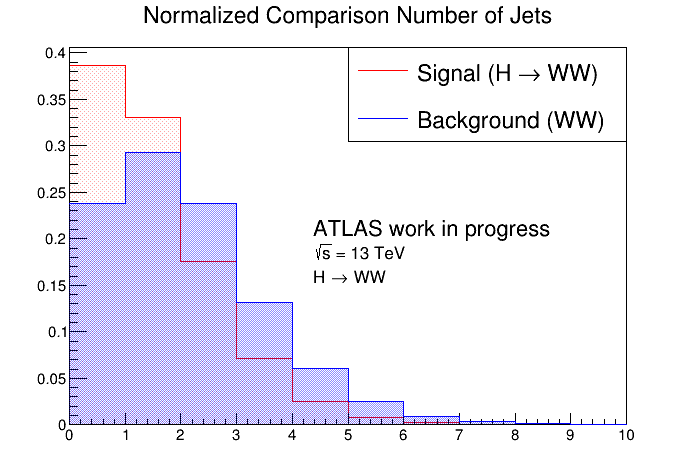

In [9]:
// We create a legend to identify the signal and background number of jets histograms in the plot
TLegend *leg = new TLegend(0.5, 0.7, 0.9, 0.9); // Position of the legend in the canvas
leg->AddEntry(hist_sig_jet_n, "Signal (H #rightarrow WW)","l");
leg->AddEntry(hist_bkg_jet_n, "Background (WW)","l");

hist_sig_jet_n->SetStats(0);
hist_bkg_jet_n->SetStats(0);

hist_sig_jet_n->SetFillStyle(3003);
hist_sig_jet_n->SetFillColorAlpha(kRed, 0.35);
hist_sig_jet_n->SetLineColor(2);

hist_bkg_jet_n->SetFillStyle(3001);
hist_bkg_jet_n->SetFillColorAlpha(kBlue, 0.45);
hist_bkg_jet_n->SetLineColor(4);

hist_sig_jet_n->DrawNormalized(""); // Draw the normalized histograms in order to perform a better comparison of number of jets

hist_bkg_jet_n->DrawNormalized("same");

TLatex l;
l.SetNDC();
l.SetTextFont(42);
l.SetTextColor(kBlack);
l.SetTextSize(0.05);  
l.DrawLatex(0.45,0.5,"ATLAS work in progress");

TLatex o;
o.SetNDC();
o.SetTextFont(42);
o.SetTextColor(kBlack);
o.SetTextSize(0.04);
double dely = 0.05; 
o.DrawLatex(0.45,0.5-dely, Form("#sqrt{s} = 13 TeV"));
o.DrawLatex(0.45,0.45-dely, Form("H #rightarrow WW"));

leg->Draw();
canvas->Draw();